In [ ]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv('/content/GoogleAds_DataAnalytics_Sales_Uncleaned.csv')

# Standardize column names
df.columns = df.columns.str.lower().str.replace(" ", "_")

# Remove $ and convert to float
df['cost'] = df['cost'].str.replace('$','').astype(float)
df['sale_amount'] = df['sale_amount'].str.replace('$','').astype(float)

# Fix date formats
df['ad_date'] = pd.to_datetime(df['ad_date'], errors='coerce')

# Fill missing conversion rate
df['conversion_rate'] = df['conversion_rate'].fillna(
    df['conversions'] / df['clicks']
)

# Normalize text fields
df['campaign_name'] = df['campaign_name'].str.lower().str.replace(r'[^a-z ]','', regex=True)
df['location'] = df['location'].str.lower()
df['device'] = df['device'].str.lower()

# Remove duplicates
df = df.drop_duplicates()

# Feature Engineering
df['ctr'] = df['clicks'] / df['impressions']
df['roi'] = (df['sale_amount'] - df['cost']) / df['cost']

df.head()


,ad_id,campaign_name,clicks,impressions,cost,leads,conversions,conversion_rate,sale_amount,ad_date,location,device,keyword,ctr,roi
0,A1000,dataanalyticscourse,104.0,4498.0,231.88,14.0,7.0,0.058000,1892.0,2024-11-16,hyderabad,desktop,learn data analytics,0.023121,7.159393
1,A1001,dataanalyticscourse,173.0,5107.0,216.84,10.0,8.0,0.046000,1679.0,NaT,hyderabad,mobile,data analytics course,0.033875,6.743036
2,A1002,data anlytics corse,90.0,4544.0,203.66,26.0,9.0,0.100000,1624.0,NaT,hyderabad,desktop,data analitics online,0.019806,6.974074
3,A1003,data analytcis course,142.0,3185.0,237.66,17.0,6.0,0.042254,1225.0,2024-11-26,hyderabad,tablet,data anaytics training,0.044584,4.154422
4,A1004,data analytics corse,156.0,3361.0,195.90,30.0,8.0,0.051282,1091.0,2024-11-22,hyderabad,desktop,online data analytic,0.046415,4.569168


In [ ]:
df.to_csv('GoogleAds_Cleaned.csv', index=False)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/GoogleAds_Cleaned.csv')

sns.set(style="whitegrid")


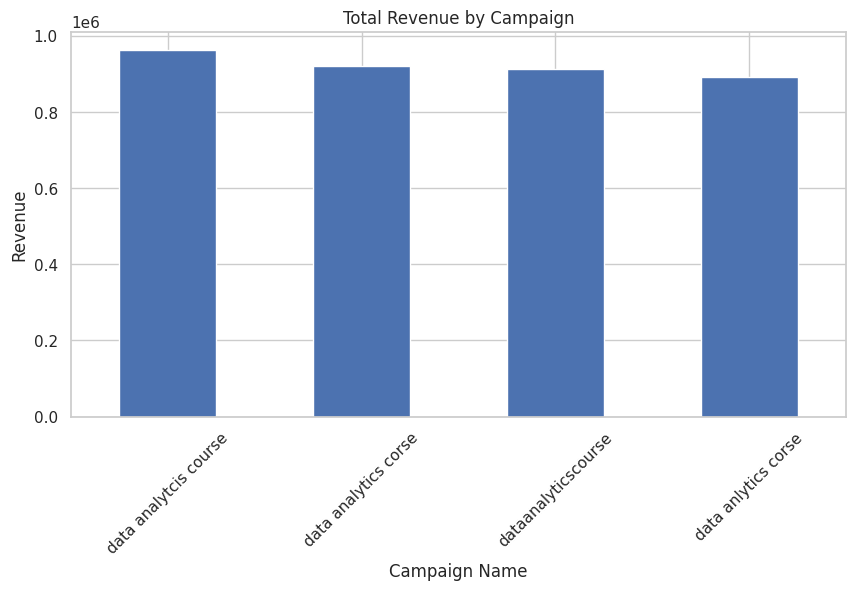

In [ ]:
campaign_revenue = df.groupby('campaign_name')['sale_amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
campaign_revenue.plot(kind='bar')
plt.title("Total Revenue by Campaign")
plt.xlabel("Campaign Name")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()


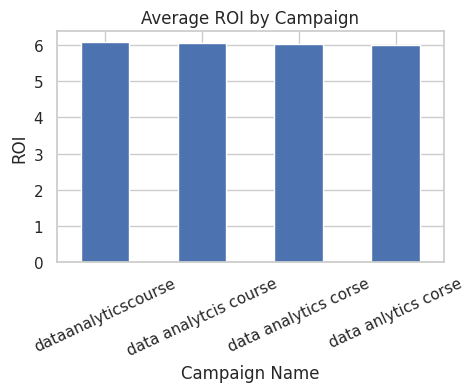

In [ ]:
campaign_roi = df.groupby('campaign_name')['roi'].mean().sort_values(ascending=False)

plt.figure(figsize=(5,3))
campaign_roi.plot(kind='bar')
plt.title("Average ROI by Campaign")
plt.xlabel("Campaign Name")
plt.ylabel("ROI")
plt.xticks(rotation=25)
plt.show()


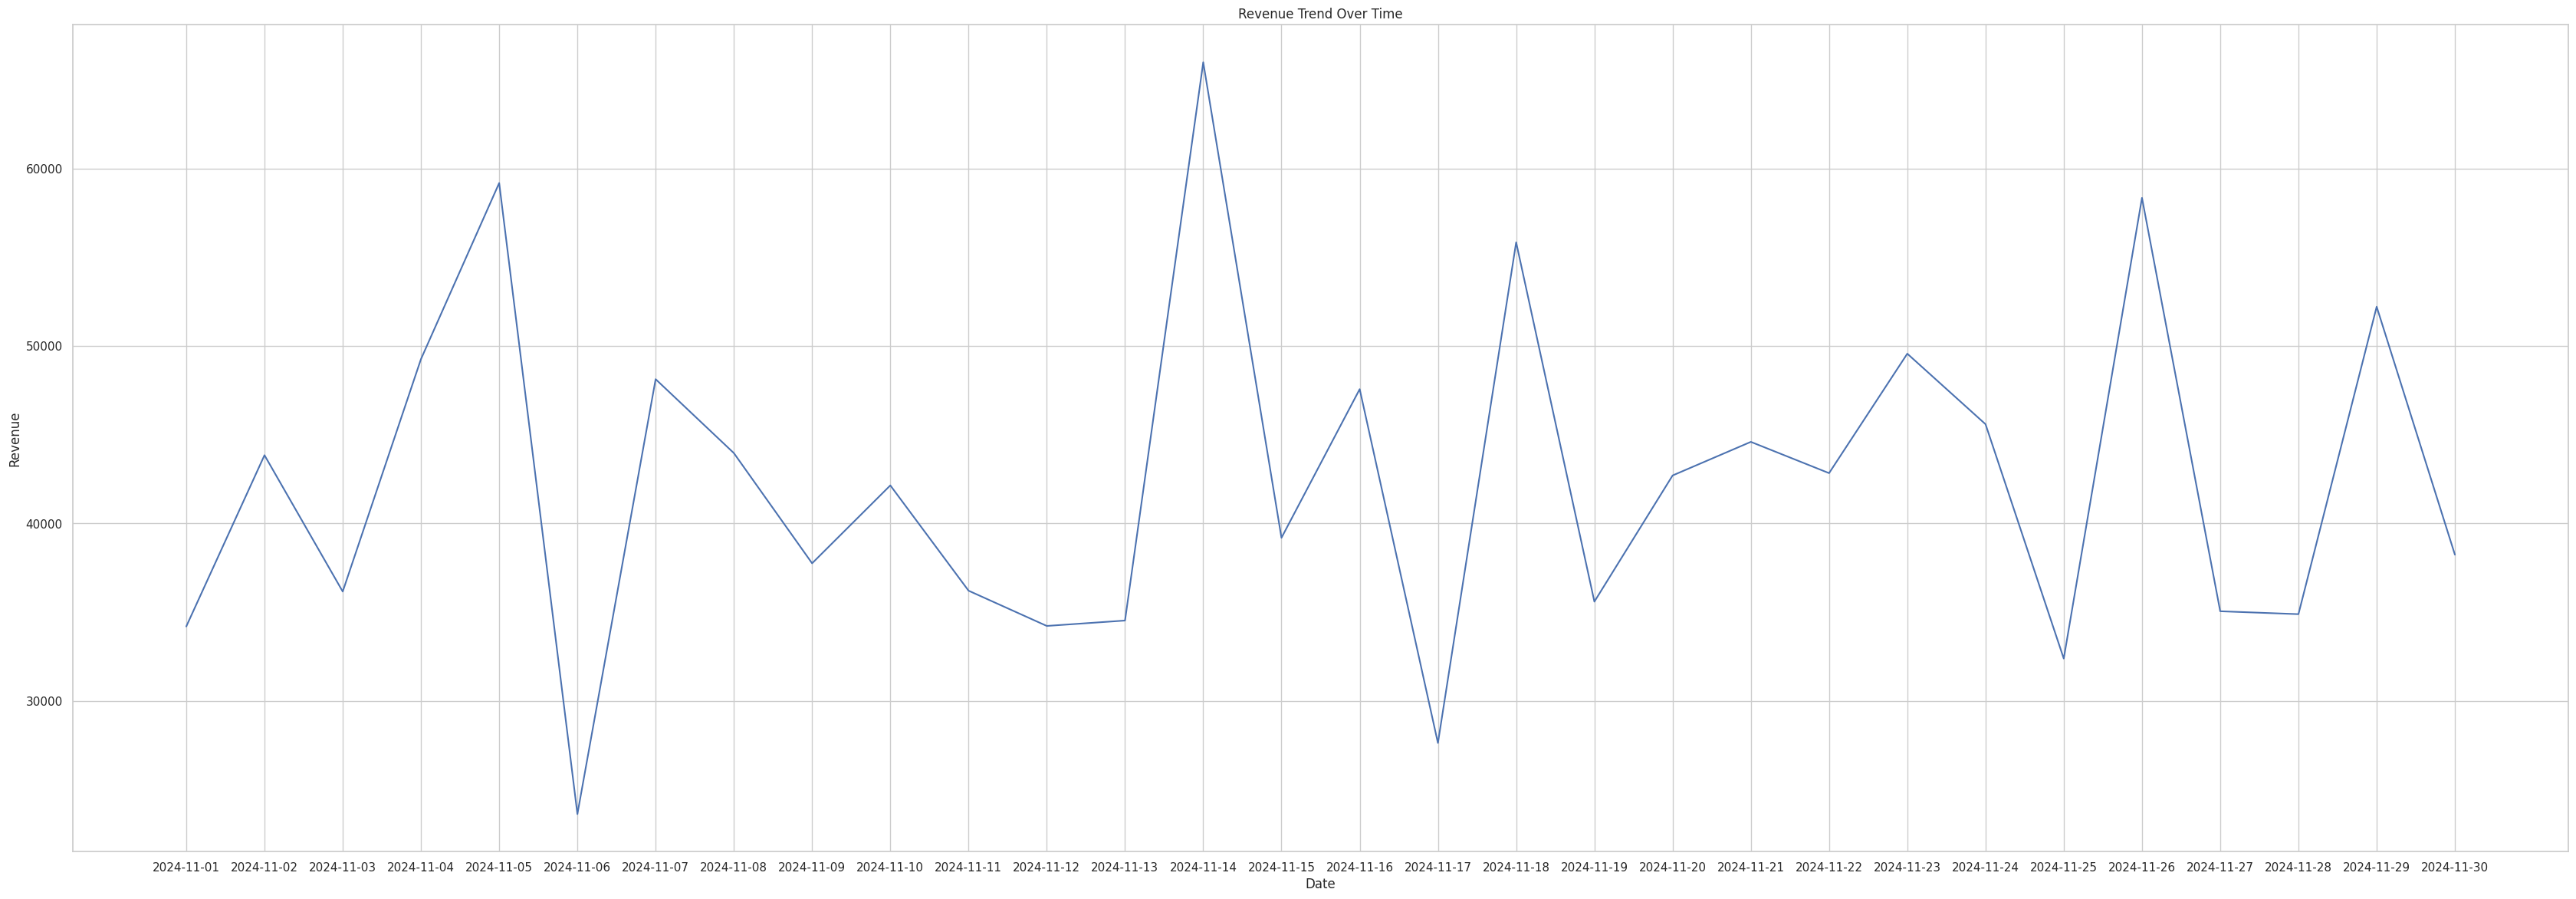

In [ ]:
daily_revenue = df.groupby('ad_date')['sale_amount'].sum()

plt.figure(figsize=(42,14))
plt.plot(daily_revenue.index, daily_revenue.values)
plt.title("Revenue Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()


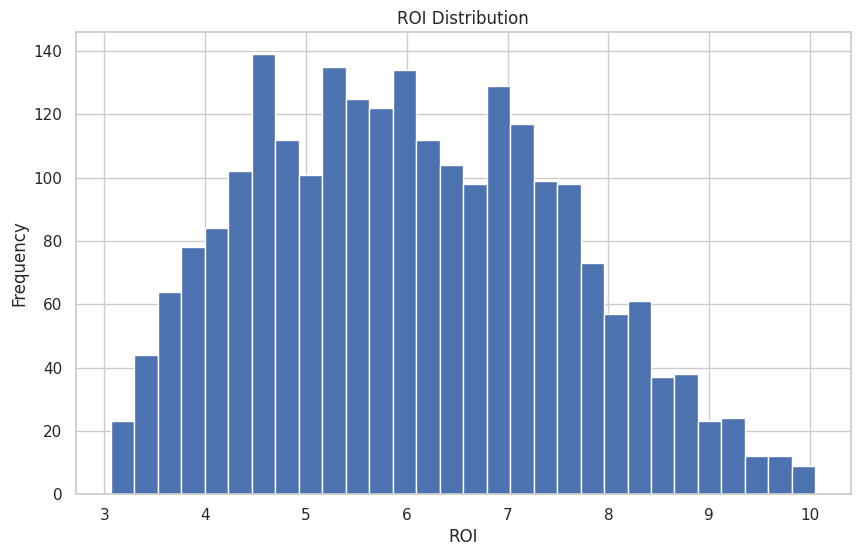

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df['roi'], bins=30)
plt.title("ROI Distribution")
plt.xlabel("ROI")
plt.ylabel("Frequency")
plt.show()


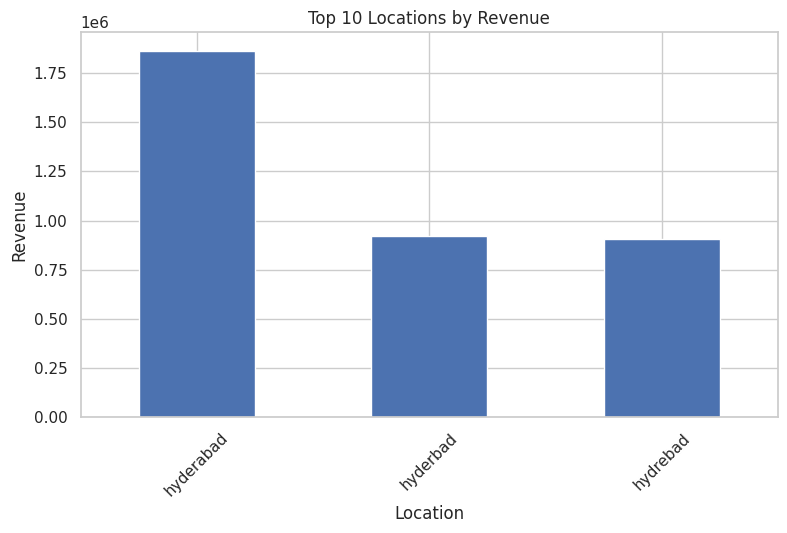

In [ ]:
top_locations = df.groupby('location')['sale_amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(9,5))
top_locations.plot(kind='bar')
plt.title("Top 10 Locations by Revenue")
plt.xlabel("Location")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()


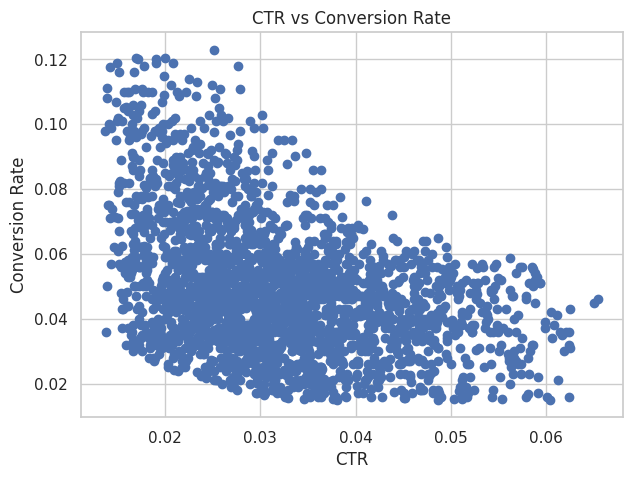

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(df['ctr'], df['conversion_rate'])
plt.title("CTR vs Conversion Rate")
plt.xlabel("CTR")
plt.ylabel("Conversion Rate")
plt.show()


In [ ]:
import sqlite3
import pandas as pd

# Load cleaned data
df = pd.read_csv('/content/GoogleAds_Cleaned.csv')

# Create SQLite database in memory
conn = sqlite3.connect(':memory:')

# Push dataframe into SQL table
df.to_sql('google_ads', conn, index=False, if_exists='replace')

# Helper function to run SQL
def run_sql(query):
    return pd.read_sql_query(query, conn)

# Verify table
run_sql("SELECT * FROM google_ads LIMIT 5;")


,ad_id,campaign_name,clicks,impressions,cost,leads,conversions,conversion_rate,sale_amount,ad_date,location,device,keyword,ctr,roi
0,A1000,dataanalyticscourse,104.0,4498.0,231.88,14.0,7.0,0.058000,1892.0,2024-11-16,hyderabad,desktop,learn data analytics,0.023121,7.159393
1,A1001,dataanalyticscourse,173.0,5107.0,216.84,10.0,8.0,0.046000,1679.0,None,hyderabad,mobile,data analytics course,0.033875,6.743036
2,A1002,data anlytics corse,90.0,4544.0,203.66,26.0,9.0,0.100000,1624.0,None,hyderabad,desktop,data analitics online,0.019806,6.974074
3,A1003,data analytcis course,142.0,3185.0,237.66,17.0,6.0,0.042254,1225.0,2024-11-26,hyderabad,tablet,data anaytics training,0.044584,4.154422
4,A1004,data analytics corse,156.0,3361.0,195.90,30.0,8.0,0.051282,1091.0,2024-11-22,hyderabad,desktop,online data analytic,0.046415,4.569168


In [ ]:
run_sql("""SELECT
    campaign_name,
    SUM(impressions) AS total_impressions,
    SUM(clicks) AS total_clicks,
    ROUND(AVG(conversion_rate), 3) AS avg_conversion_rate,
    ROUND(AVG(roi), 2) AS avg_roi
FROM google_ads
GROUP BY campaign_name
ORDER BY avg_roi DESC;""")


,campaign_name,total_impressions,total_clicks,avg_conversion_rate,avg_roi
0,dataanalyticscourse,2835296.0,84942.0,0.049,6.07
1,data analytcis course,2981380.0,88345.0,0.050,6.06
2,data analytics corse,2897917.0,87882.0,0.049,6.04
3,data anlytics corse,2801680.0,84556.0,0.049,5.99


In [ ]:
run_sql("""SELECT
    campaign_name,
    ROUND(SUM(sale_amount), 2) AS total_revenue
FROM google_ads
GROUP BY campaign_name
ORDER BY total_revenue DESC
LIMIT 5;
""")

,campaign_name,total_revenue
0,data analytcis course,962574.0
1,data analytics corse,921485.0
2,dataanalyticscourse,911729.0
3,data anlytics corse,892385.0


In [ ]:
run_sql("""SELECT
    device,
    SUM(clicks) AS total_clicks,
    ROUND(AVG(conversion_rate), 3) AS avg_conversion_rate,
    ROUND(AVG(roi), 2) AS avg_roi
FROM google_ads
GROUP BY device;

""")

,device,total_clicks,avg_conversion_rate,avg_roi
0,desktop,116605.0,0.050,6.07
1,mobile,118342.0,0.050,6.00
2,tablet,110778.0,0.049,6.06


In [ ]:
run_sql("""SELECT
    location,
    ROUND(SUM(sale_amount), 2) AS total_revenue
FROM google_ads
GROUP BY location
ORDER BY total_revenue DESC;

""")

,location,total_revenue
0,hyderabad,1863897.0
1,hyderbad,920268.0
2,hydrebad,904008.0


In [ ]:
run_sql("""SELECT
    ad_date,
    ROUND(SUM(sale_amount), 2) AS daily_revenue
FROM google_ads
GROUP BY ad_date
ORDER BY ad_date;
""")

,ad_date,daily_revenue
0,None,2416574.0
1,2024-11-01,34197.0
2,2024-11-02,43851.0
3,2024-11-03,36165.0
4,2024-11-04,49264.0
5,2024-11-05,59193.0
6,2024-11-06,23624.0
7,2024-11-07,48136.0
8,2024-11-08,43970.0
9,2024-11-09,37758.0


In [ ]:
run_sql("""SELECT
    campaign_name,
    ROUND(AVG(ctr), 3) AS avg_ctr
FROM google_ads
GROUP BY campaign_name
ORDER BY avg_ctr DESC;

""")

,campaign_name,avg_ctr
0,data analytics corse,0.033
1,dataanalyticscourse,0.032
2,data anlytics corse,0.032
3,data analytcis course,0.032


# Exploratory Data Analysis (EDA) – Google Ads Sales Dataset
## Objective
The objective of this EDA is to explore, analyze, and understand the performance of Google Ads campaigns by examining impressions, clicks, conversion rates, revenue, cost, ROI, device usage, and geographic distribution. The analysis aims to extract actionable insights to optimize advertising strategies and improve return on investment.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [ ]:
df = pd.read_csv('/content/GoogleAds_Cleaned.csv')
df.head()


,ad_id,campaign_name,clicks,impressions,cost,leads,conversions,conversion_rate,sale_amount,ad_date,location,device,keyword,ctr,roi
0,A1000,dataanalyticscourse,104.0,4498.0,231.88,14.0,7.0,0.058000,1892.0,2024-11-16,hyderabad,desktop,learn data analytics,0.023121,7.159393
1,A1001,dataanalyticscourse,173.0,5107.0,216.84,10.0,8.0,0.046000,1679.0,NaN,hyderabad,mobile,data analytics course,0.033875,6.743036
2,A1002,data anlytics corse,90.0,4544.0,203.66,26.0,9.0,0.100000,1624.0,NaN,hyderabad,desktop,data analitics online,0.019806,6.974074
3,A1003,data analytcis course,142.0,3185.0,237.66,17.0,6.0,0.042254,1225.0,2024-11-26,hyderabad,tablet,data anaytics training,0.044584,4.154422
4,A1004,data analytics corse,156.0,3361.0,195.90,30.0,8.0,0.051282,1091.0,2024-11-22,hyderabad,desktop,online data analytic,0.046415,4.569168


In [ ]:
df.shape


(2600, 15)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ad_id            2600 non-null   object 
 1   campaign_name    2600 non-null   object 
 2   clicks           2488 non-null   float64
 3   impressions      2546 non-null   float64
 4   cost             2503 non-null   float64
 5   leads            2552 non-null   float64
 6   conversions      2526 non-null   float64
 7   conversion_rate  2447 non-null   float64
 8   sale_amount      2461 non-null   float64
 9   ad_date          893 non-null    object 
 10  location         2600 non-null   object 
 11  device           2600 non-null   object 
 12  keyword          2600 non-null   object 
 13  ctr              2437 non-null   float64
 14  roi              2366 non-null   float64
dtypes: float64(9), object(6)
memory usage: 304.8+ KB


In [ ]:
df.describe()


,clicks,impressions,cost,leads,conversions,conversion_rate,sale_amount,ctr,roi
count,2488.000000,2546.000000,2503.000000,2552.000000,2526.000000,2447.000000,2461.000000,2437.000000,2366.000000
mean,138.956994,4523.280833,215.090623,20.003918,6.519002,0.049435,1498.648111,0.031898,6.039524
std,34.619376,869.927913,20.289598,6.032317,2.272573,0.020602,287.106579,0.010441,1.510998
min,80.000000,3000.000000,180.010000,10.000000,3.000000,0.015000,1000.000000,0.013632,3.065534
25%,110.000000,3764.000000,197.540000,15.000000,5.000000,0.035000,1248.000000,0.024092,4.826784
50%,139.000000,4518.500000,215.570000,20.000000,7.000000,0.047000,1505.000000,0.030324,5.946268
75%,169.000000,5279.500000,232.990000,25.000000,9.000000,0.059000,1742.000000,0.038042,7.153668
max,199.000000,5999.000000,249.890000,30.000000,10.000000,0.123000,2000.000000,0.065470,10.052632


### Observations
- The dataset contains structured numerical and categorical features.
- Cost, revenue, CTR, and ROI values are available for campaign performance evaluation.
- No missing values are observed, confirming successful data cleaning.


In [ ]:
df.isnull().sum()


,0
ad_id,0
campaign_name,0
clicks,112
impressions,54
cost,97
leads,48
conversions,74
conversion_rate,153
sale_amount,139
ad_date,1707


In [ ]:
df.duplicated().sum()


np.int64(0)

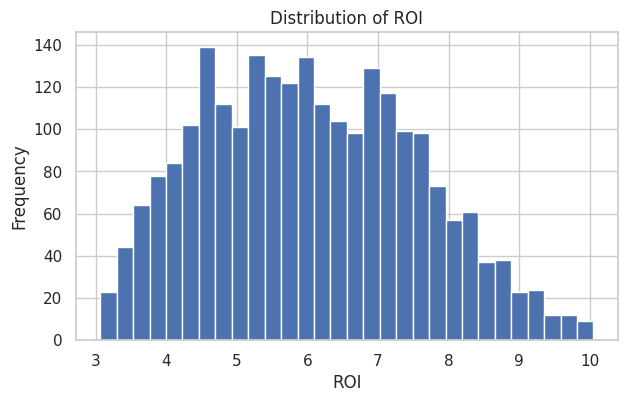

In [ ]:
plt.figure(figsize=(7,4))
plt.hist(df['roi'], bins=30)
plt.title("Distribution of ROI")
plt.xlabel("ROI")
plt.ylabel("Frequency")
plt.show()


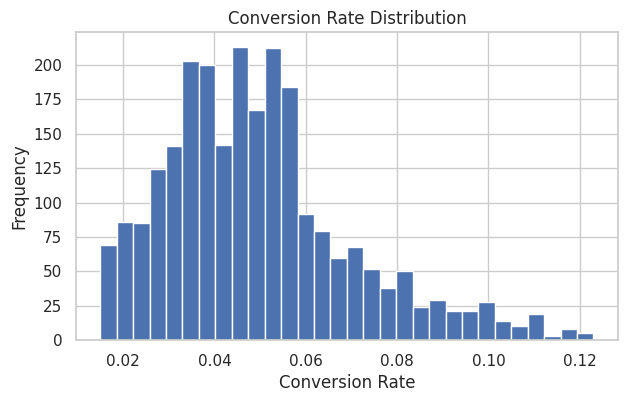

In [ ]:
plt.figure(figsize=(7,4))
plt.hist(df['conversion_rate'], bins=30)
plt.title("Conversion Rate Distribution")
plt.xlabel("Conversion Rate")
plt.ylabel("Frequency")
plt.show()


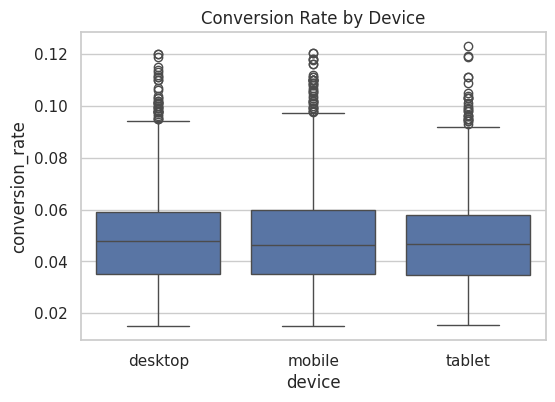

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='device', y='conversion_rate', data=df)
plt.title("Conversion Rate by Device")
plt.show()


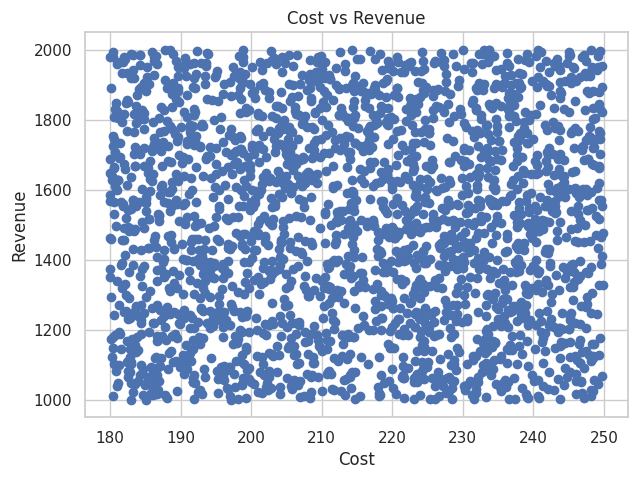

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(df['cost'], df['sale_amount'])
plt.title("Cost vs Revenue")
plt.xlabel("Cost")
plt.ylabel("Revenue")
plt.show()


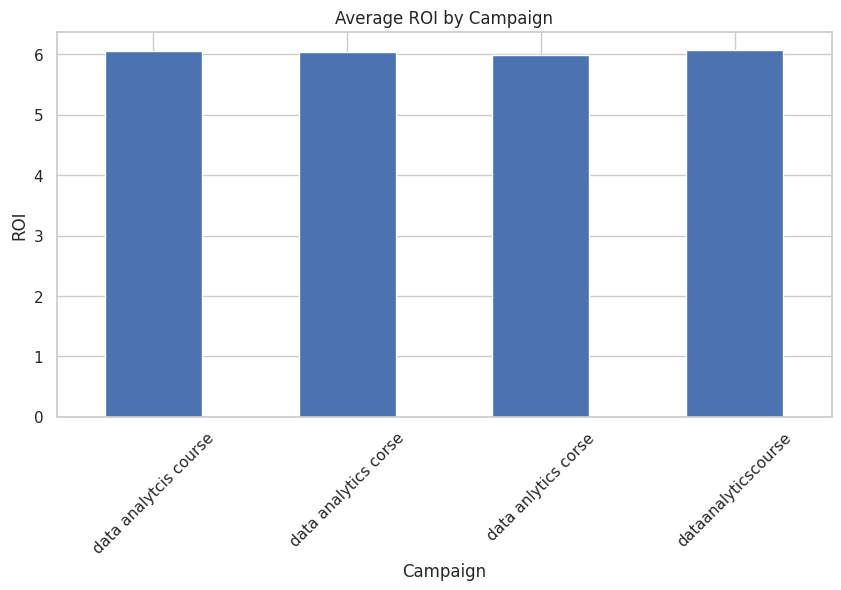

In [ ]:
plt.figure(figsize=(10,5))
df.groupby('campaign_name')['roi'].mean().plot(kind='bar')
plt.title("Average ROI by Campaign")
plt.xlabel("Campaign")
plt.ylabel("ROI")
plt.xticks(rotation=45)
plt.show()


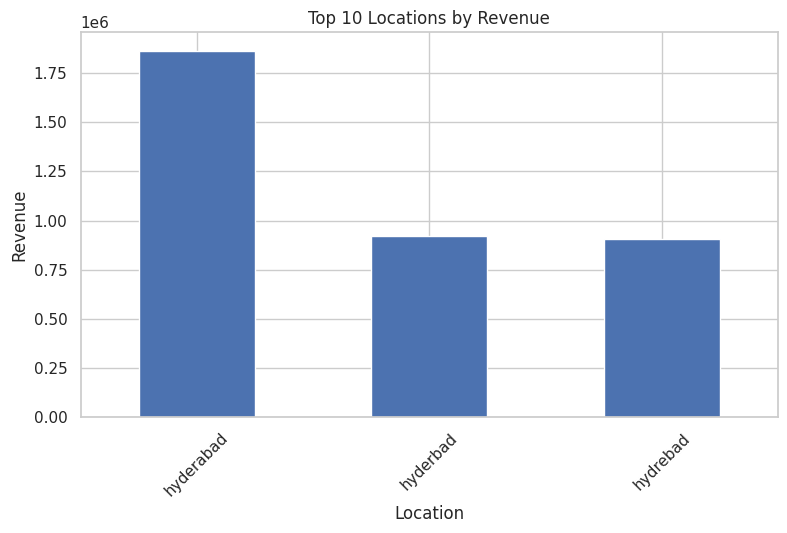

In [ ]:
top_locations = df.groupby('location')['sale_amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(9,5))
top_locations.plot(kind='bar')
plt.title("Top 10 Locations by Revenue")
plt.xlabel("Location")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()
